#Objectives
1-Accurately Predict User Ad Click Behavior

2-Improve Advertisement Targeting

3-Evaluate and Compare Model Performance



In [ ]:
import pandas as pd

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

Data Description

In [ ]:
df=pd.read_csv("/content/advertising.csv")

In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
df1=df[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male','Clicked on Ad']]

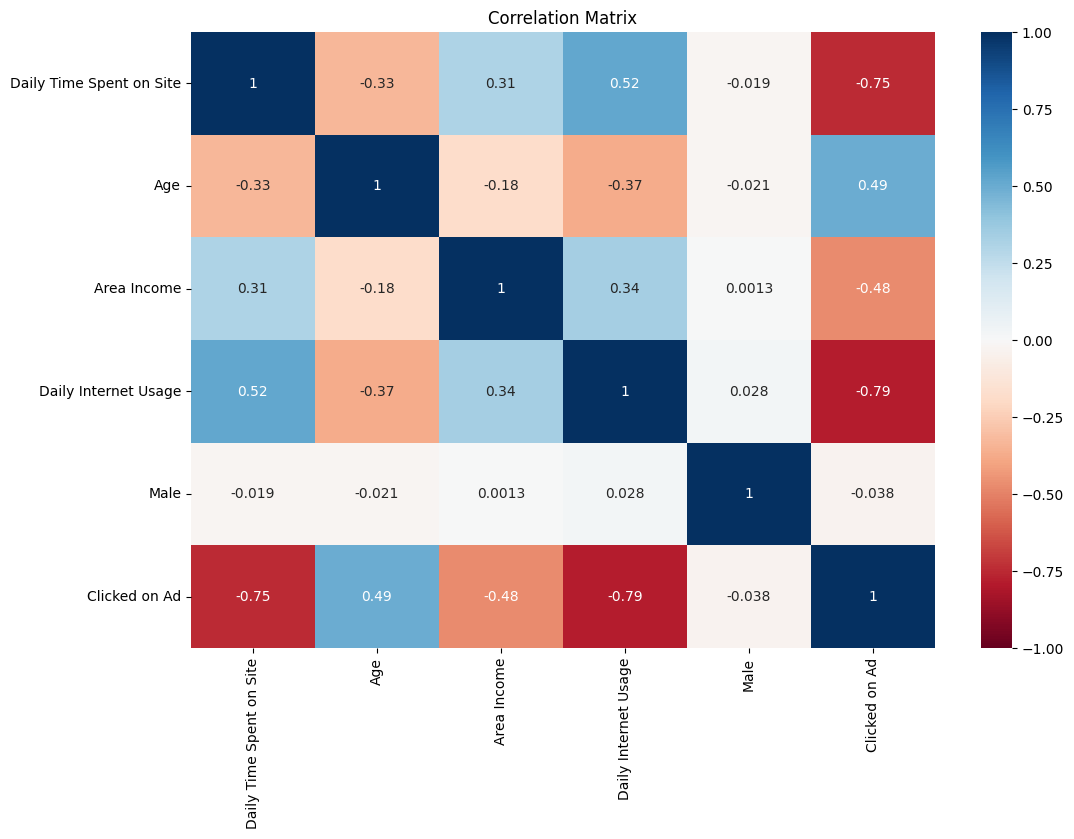

In [ ]:
plt.figure(figsize=(12, 8))
s = sns.heatmap(df1.corr(),
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Interpretation:In our correlation heatmap, it is visible that the click outcome is inversely correlated with the amount of time an individual spends on the site and the internet in a reverse direction.

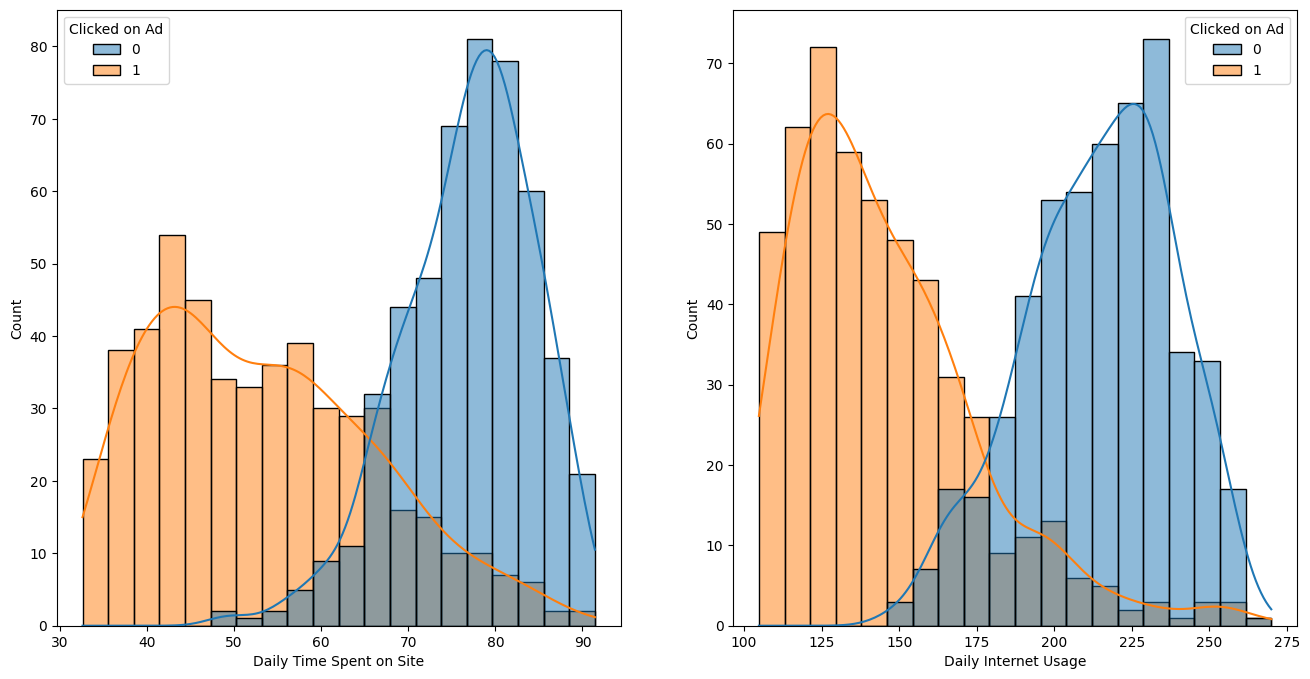

In [ ]:
# Let's have a look at the relation between 'daily spent time on site' and 'ad click'
# also the relation between 'daily internet usage' and 'ad click'

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
# plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Daily Time Spent on Site', bins=20, kde=True, hue='Clicked on Ad', ax=axs[0])
sns.histplot(data=df, x='Daily Internet Usage', bins=20, kde=True, hue='Clicked on Ad', ax=axs[1])

plt.show()

In [ ]:
# This insight can be valuable for optimizing ad placements and improving overall ad click-through rates based on user engagement metrics.

In [ ]:
# Let’s see how age influences the ad click event. Apparently, the younger population is less attracted to the ads.

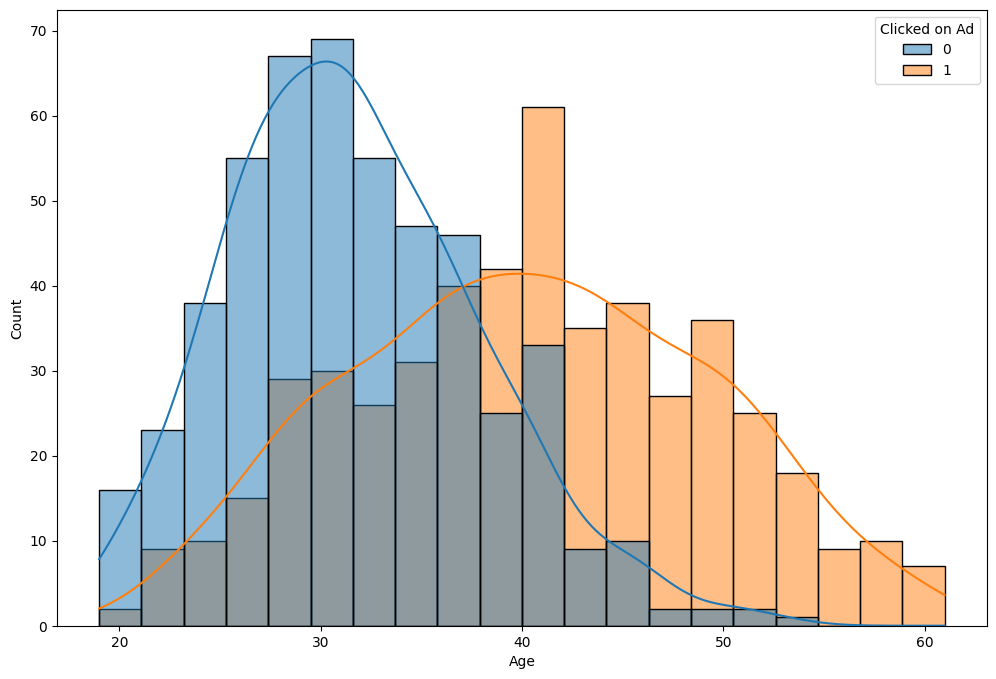

In [ ]:
#Let's have a look at the distribution of the age group

# fig, axs = plt.subplots(1, 2, figsize=(16, 8))
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Age', bins=20, kde=True, hue='Clicked on Ad')
plt.show()

In [ ]:
#1-Accurately Predict User Ad Click Behavior
# to build machine learning models (Logistic Regression, SVM, Random Forest, etc.) that accurately predict whether a user will click on an online advertisement.

Model Selection

In [ ]:
# We don’t need to standardize our dataset before training the model because logistic regression is not that sensitive to the different scales of features.

In [ ]:
X = df.drop(labels=['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'], axis=1)
y = df['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
lr_predict = lr_model.predict(X_test)

print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       146
           1       0.97      0.96      0.97       154

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [ ]:
# The model has a high overall accuracy (90%), indicating good performance in distinguishing between the two classes.
# Precision and recall for both classes are also high, suggesting that the model performs well in both identifying the true positives and true negatives.
# The F1-scores for both classes are relatively balanced (0.90 for class 0 and 0.89 for class 1), suggesting that the model has a good balance between precision and recall.

In [ ]:
#Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

regr_model = RandomForestClassifier(min_samples_leaf=50,
                      n_estimators=150,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      max_features='sqrt')

regr_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=50, n_estimators=150, n_jobs=-1,
                       oob_score=True)

In [ ]:
y_pred = regr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       146
           1       0.91      0.95      0.93       154

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [ ]:
#Support vector mahine
from sklearn.svm import SVC
clf = SVC(kernel='linear')

# fitting x samples and y classes
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
svm_predict = clf.predict(X_test)
print(classification_report(y_test, svm_predict))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       146
           1       0.97      0.94      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
nb_predict = nb.predict(X_test)
print(classification_report(y_test,nb_predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       146
           1       0.96      0.96      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


# Define the base estimators
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('svm', SVC(kernel='linear',probability=True)),
    ('lr', LogisticRegression()),
    ('nb', GaussianNB())  # Add Naive Bayes classifier
]

# Define the stacking classifier with XGBoost as the final estimator
stacking_model = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier())

# Fit the model
stacking_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('svm', SVC(kernel='linear', probability=True)),
                               ('lr', LogisticRegression()),
                               ('nb', GaussianNB())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 device=None,
                                                 early_stopping_rounds=None,
                                                 enable_categ...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [ ]:
y_pred = stacking_model.predict(X_test)
print(y_pred)

[1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0
 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0
 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0
 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1
 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1
 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1
 0 1 1 0]


In [ ]:
#Advanced Technique

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9533333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       146
           1       0.97      0.94      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [ ]:
# 2)-Improve Advertisement Targeting
# to enhance ad targeting by identifying key factors (such as user demographics, browsing behavior, or previous engagement) that influence whether users are likely to click on ads.

Model Interpretation

In [ ]:
#For random forest
# Get feature importance
feature_importances = regr_model.feature_importances_

# Create a DataFrame for feature importances
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(importances_df)

                    Feature  Importance
3      Daily Internet Usage    0.495188
0  Daily Time Spent on Site    0.310791
2               Area Income    0.119503
1                       Age    0.074209
4                      Male    0.000309


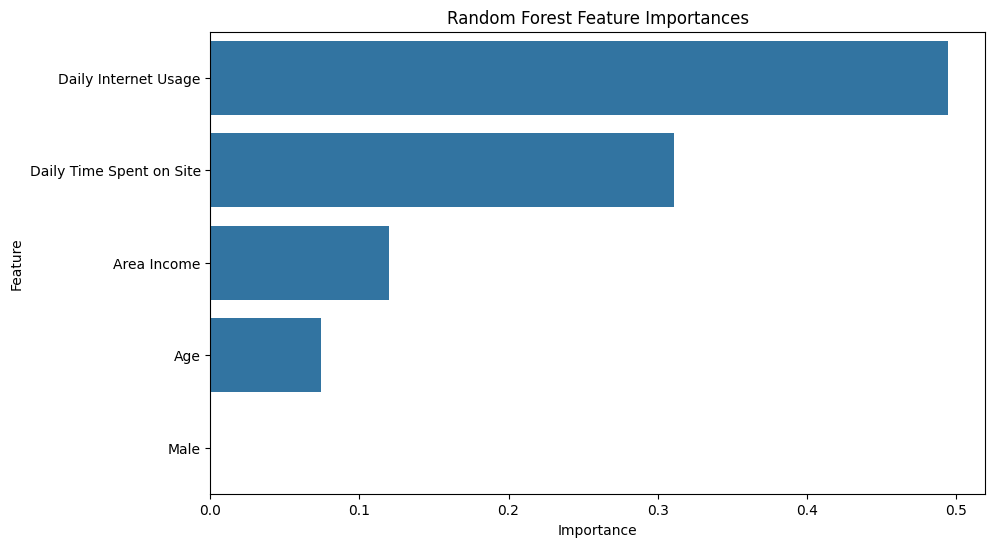

In [ ]:
# Plot Random Forest feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Random Forest Feature Importances')
plt.show()

In [ ]:
#the model found daily internet usage and time spent on the site to be the most predictive variables, meaning you could focus on optimizing these aspects for ad engagement. The low importance of gender implies it has minimal predictive power in this context.

In [ ]:
# 3)Evaluate and Compare Model Performance
# to evaluate and compare the performance of multiple models, such as Logistic Regression, SVM, Random Forest, and potentially others, using accuracy, precision, recall, and AUC-ROC metrics. This helps in determining the best-performing model for real-time deployment in ad campaigns.

In [ ]:
# Initialize the models
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(kernel='linear',probability=True),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
}

# Dictionary to store results
results = {'Model': [], 'Accuracy': [], 'ROC-AUC': []}

# Train each model and compute metrics
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Append results
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['ROC-AUC'].append(roc_auc)

    # Print classification report
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))


Model: Random Forest
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       146
           1       0.95      0.94      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

Model: SVM
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       146
           1       0.97      0.94      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Comparison of three models

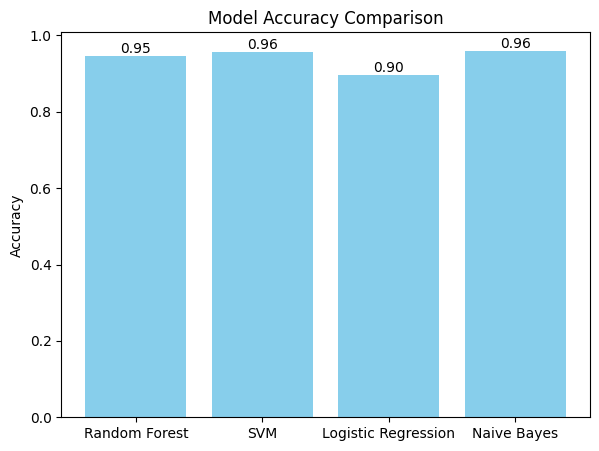

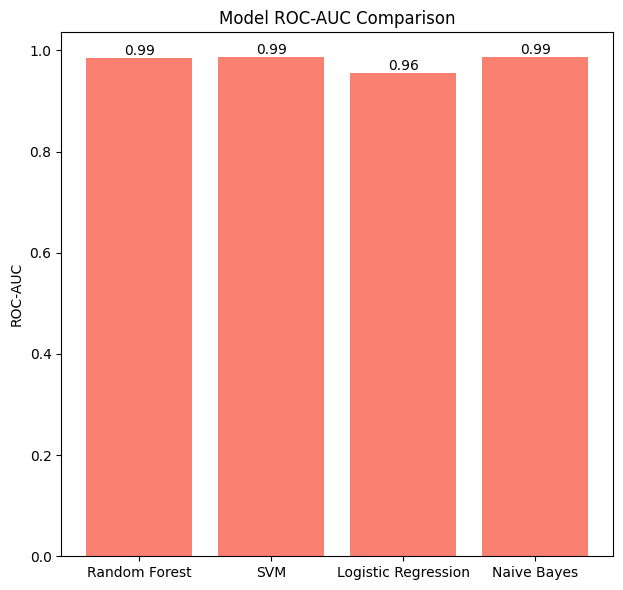

In [ ]:
# Plot Accuracy and ROC-AUC
plt.figure(figsize=(15, 5))

# Bar plot for accuracy
plt.subplot(1, 2, 1)
bars=plt.bar(results['Model'], results['Accuracy'], color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
# Annotate each bar with the accuracy value
for bar in bars:
    yval = bar.get_height()  # Get the height of each bar
    plt.text(
        bar.get_x() + bar.get_width()/2,  # X-coordinate: center of the bar
        yval,  # Y-coordinate: height of the bar
        f'{yval:.2f}',  # Text to display (formatted to 2 decimal places)
        ha='center',  # Horizontal alignment
        va='bottom'  # Vertical alignment
    )

plt.show()
# Bar plot for ROC-AUC
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
bar2=plt.bar(results['Model'], results['ROC-AUC'], color='salmon')
plt.ylabel('ROC-AUC')
plt.title('Model ROC-AUC Comparison')
# Annotate each bar with the accuracy value
for bar in bar2:
    yval = bar.get_height()  # Get the height of each bar
    plt.text(
        bar.get_x() + bar.get_width()/2,  # X-coordinate: center of the bar
        yval,  # Y-coordinate: height of the bar
        f'{yval:.2f}',  # Text to display (formatted to 2 decimal places)
        ha='center',  # Horizontal alignment
        va='bottom'  # Vertical alignment
    )
plt.tight_layout()
plt.show()


In [ ]:
# Dummy Variables for a new user

In [ ]:
# Example input data for a new user
import pandas as pd

# Assuming 'X_new' is the new user data (it must have the same features used for training)
X_new = pd.DataFrame({
    'Daily Time Spent on Site': [74.3,67.7,88.7,59.0,61.9],
    'Age': [21,55,35,29,50],
    'Area Income': [59785.94,62491.01,30976,23821.72,61628.72],
    'Daily Internet Usage': [221.51,118.39,143.5,123.55,200.8],
    'Male': [1,0,0,1,1],
    # ... add all other features
})

# Ensure the input data is preprocessed in the same way as the training data

# Predict using each model
rf_prediction = models['Random Forest'].predict(X_new)
svm_prediction = models['SVM'].predict(X_new)
lr_prediction = models['Logistic Regression'].predict(X_new)
nb_prediction = models['Naive Bayes'].predict(X_new)

# Print the predictions
print("Random Forest Prediction:", rf_prediction)
print("SVM Prediction:", svm_prediction)
print("Logistic Regression Prediction:", lr_prediction)
print("Naive Bayes Prediction:", nb_prediction)


Random Forest Prediction: [0 1 1 1 1]
SVM Prediction: [0 1 1 1 1]
Logistic Regression Prediction: [0 1 0 1 1]
Naive Bayes Prediction: [0 1 1 1 1]


In [ ]:
# Save the trained model to a file
# import pickle
# with open('lr_model.pkl', 'wb') as file:
#     pickle.dump(lr_model, file)

In [ ]:
# sentiment analysis

In [ ]:
# import pickle

In [ ]:
# # Save the trained model to a file
# with open('lr_model.pkl', 'wb') as file:
#     pickle.dump(lr_model, file)

In [ ]:
# !pip install Flask


In [ ]:
# from flask import Flask, request, jsonify
# import pickle
# import numpy as np

# # Initialize the Flask app
# app = Flask(__name__)

# # Load the trained Logistic Regression model
# model = pickle.load(open('lr_model.pkl', 'rb'))

# # Define the route for predictions
# @app.route('/predict', methods=['POST'])
# def predict():
#     # Get the JSON data from the request
#     data = request.json

#     # Convert the input features into a numpy array
#     features = np.array(data['features']).reshape(1, -1)

#     # Predict using the loaded model
#     prediction = model.predict(features)

#     # Return the prediction result as JSON
#     return jsonify({'prediction': int(prediction[0])})

# # Run the app
# if __name__ == '__main__':
#     app.run(debug=True)


In [ ]:
# !pip install flask-ngrok


In [ ]:
# from google.colab import files
# uploaded = files.upload()


In [5]:
num=int(input("Enter a number:"))
if num%2==0:
    print("No is even")
else:
    print("No is odd")

Enter a number:12
No is even
